In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Definición de los rangos de las variables de entrada
speed = ctrl.Antecedent(np.arange(0, 16, 1), "speed")
acceleration = ctrl.Antecedent(np.arange(0, 16, 1), "acceleration")
distance = ctrl.Antecedent(np.arange(0, 16, 1), "distance")

In [3]:
# Definición de las funciones de membresía
speed["tooSlow"] = fuzz.trapmf(speed.universe, [0, 0, 2, 3])
speed["slow"] = fuzz.trapmf(speed.universe, [2, 3, 5, 6])
speed["optimal"] = fuzz.trapmf(speed.universe, [5, 6, 9, 10])
speed["fast"] = fuzz.trapmf(speed.universe, [9, 10, 12, 13])
speed["tooFast"] = fuzz.trapmf(speed.universe, [12, 13, 15, 15])

acceleration["decelerating"] = fuzz.trapmf(acceleration.universe, [0, 0, 2, 5])
acceleration["constant"] = fuzz.trimf(acceleration.universe, [2, 5, 8])
acceleration["accelering"] = fuzz.trapmf(acceleration.universe, [5, 8, 15, 15])

distance["veryClose"] = fuzz.trimf(distance.universe, [0, 0, 3])
distance["close"] = fuzz.trapmf(distance.universe, [0, 3, 7, 10])
distance["distant"] = fuzz.trapmf(distance.universe, [7, 10, 15, 15])

C:\Users\Luis Eguia.EQUIPO-DELL\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


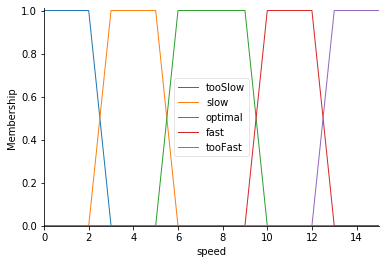

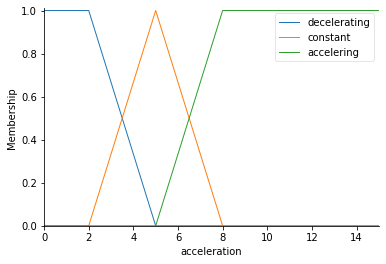

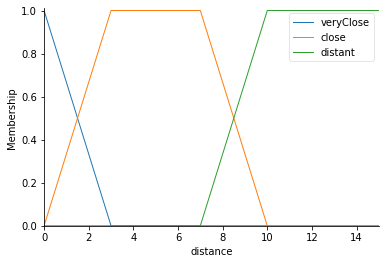

In [4]:
speed.view()
acceleration.view()
distance.view()

In [5]:
# Definiendo la variable de salida power (flujo de combustible)
power = ctrl.Consequent(np.arange(0, 11, 1), 'power')

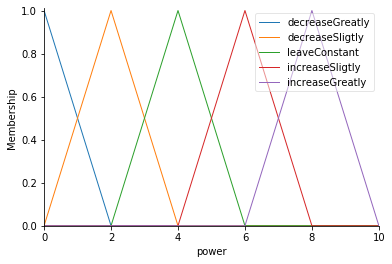

In [6]:
# Definiendo la función de membresía para la variable de salida
power["decreaseGreatly"] = fuzz.trimf(power.universe, [0, 0, 2])
power["decreaseSligtly"] = fuzz.trimf(power.universe, [0, 2, 4])
power["leaveConstant"] = fuzz.trimf(power.universe, [2, 4, 6])
power["increaseSligtly"] = fuzz.trimf(power.universe, [4, 6, 8])
power["increaseGreatly"] = fuzz.trimf(power.universe, [6, 8, 10])

power.view()

In [7]:
# Defining rules
r1 = ctrl.Rule(speed["tooSlow"] & acceleration["decelerating"], power['decreaseGreatly'])
r2 = ctrl.Rule(speed["slow"] & acceleration["decelerating"], power['decreaseSligtly'])
r3 = ctrl.Rule(speed["optimal"] & acceleration["decelerating"], power['decreaseSligtly'])
r4 = ctrl.Rule(speed["fast"] & acceleration["constant"], power['leaveConstant'])
r5 = ctrl.Rule(speed["fast"] & acceleration["accelering"], power['leaveConstant'])
r6 = ctrl.Rule(speed["tooFast"] & acceleration["constant"], power['leaveConstant'])
r7 = ctrl.Rule(speed["tooFast"] & acceleration["decelerating"], power['decreaseSligtly'])
r8 = ctrl.Rule(speed["tooFast"] & acceleration["accelering"], power['increaseGreatly'])

r10 = ctrl.Rule(distance["distant"], power['leaveConstant'])
r11 = ctrl.Rule(distance["close"] & acceleration["decelerating"], power['decreaseSligtly'])
r12 = ctrl.Rule(distance["veryClose"], power['decreaseSligtly'])
r13 = ctrl.Rule(distance["veryClose"] & acceleration["accelering"], power['increaseSligtly'])

In [8]:
# Creando controlador difuso con las reglas especificadas anteriormente
# y creando una simulación
power_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r10, r11, r12, r13])
pow = ctrl.ControlSystemSimulation(power_ctrl)

Power: 5.285714285714285


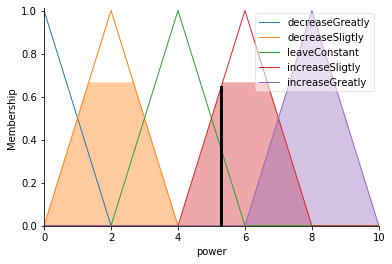

In [9]:
pow.input["speed"] = 13
pow.input["acceleration"] = 9
pow.input["distance"] = 1

pow.compute()
print("Power: {0}".format(pow.output["power"]))
power.view(sim=pow)